In [1]:
import numpy as np 
from gensim.models import Word2Vec
from sklearn.manifold import TSNE # Vektörleri görselleştirmye yarayan  kütüphane 
import matplotlib.pyplot as plt 

In [2]:
f = open("hurriyet.txt", "r" , encoding = "utf-8")
text = f.read()
t_list = text.split("\n")

corpus = []

for cumle in t_list:
    corpus.append(cumle.split())

In [3]:
print(corpus[:10])

[['iran', 'devlet', 'televizyonu', 'ülkedeki', 'eyaletin', 'sinde', 'yapılan', 'reformcuları', 'protesto', 'amaçlı', 'yürüyüşlere', 'milyonlarca', 'kişinin', 'katıldığını', 'bildirdi'], ['gösterilerde', 'fitnecilere', 'ölüm', 'münafıklara', 'ölüm', 'abd', 'ye', 'ölüm', 'ingiltere', 'ye', 'ölüm', 'sloganları', 'atıldı'], ['dini', 'lider', 'ali', 'hamaney', 've', 'cumhurbaşkanı', 'mahmud', 'ahmedinejad', 'ı', 'destekleyen', 'iranlılar', 'son', 'olaylarda', 'yeğeni', 'öldürülen', 'mir', 'hüseyin', 'musevi', 'başta', 'olmak', 'üzere', 'muhalefet', 'liderlerini', 'kınadılar'], ['musevi', 'ye', 'ölüm', 've', 'idam', 'idam', 'sloganları', 'duyuldu'], ['muhalefet', 'liderleri', 'kaçtı', 'mı', 'aşure', 'günü', 'yaşanan', 'çatışmalarda', 'devlet', 'kaynaklarına', 'göre', 'u', 'terörist', 'olmak', 'üzere', 'kişi', 'ölmüştü'], ['den', 'fazla', 'kişinin', 'yaralandığı', 'olaylar', 'sırasında', 'en', 'az', 'kişi', 'tutuklanmıştı'], ['öte', 'yandan', 'iran', 'haber', 'ajansı', 'irna', 'muhalif', 'lid

In [17]:
model = Word2Vec(corpus, window=6, min_count=5, sg=1, vector_size=100)

In [18]:
model.wv["ankara"]

array([-1.01925686e-01, -2.14832529e-01, -2.28288576e-01, -6.17522188e-02,
        8.32032800e-01,  7.73802549e-02, -3.39915782e-01,  3.79258960e-01,
       -5.37782833e-02, -1.43704861e-01,  2.94495940e-01, -3.45047474e-01,
       -1.16556183e-01,  5.09578943e-01,  1.17597669e-01,  7.66097084e-02,
        4.31005627e-01, -3.40766907e-02,  3.12961221e-01, -5.46022773e-01,
        5.15292771e-02,  2.31340513e-01,  6.15274794e-02, -7.14753807e-01,
       -1.31091811e-02, -6.49108039e-03, -9.91389811e-01, -1.27379435e-05,
       -5.75938523e-01,  4.68838155e-01,  2.81831324e-01, -3.65645289e-02,
       -4.45281453e-02, -1.25402093e-01,  8.88043046e-02,  3.85539919e-01,
       -4.49187934e-01, -1.46743059e-01, -6.21258989e-02, -8.65414023e-01,
        6.40285134e-01, -2.59671390e-01,  5.79251707e-01,  3.16682935e-01,
        5.51297009e-01,  1.76663145e-01, -4.49545264e-01, -2.79437155e-01,
        3.69565606e-01, -2.12197914e-03, -1.81978494e-02, -1.06293082e-01,
       -6.09869622e-02, -

In [19]:
model.wv.most_similar("hollanda")

[('danimarka', 0.805886447429657),
 ('avusturya', 0.7830668091773987),
 ('belçika', 0.7780661582946777),
 ('kanada', 0.7476925849914551),
 ('almanya', 0.7384268045425415),
 ('finlandiya', 0.7255740165710449),
 ('avustralya', 0.7170604467391968),
 ('ispanya', 0.7143300175666809),
 ('fransa', 0.7069762349128723),
 ('estonya', 0.7061556577682495)]

In [20]:
model.wv.most_similar("pazar")

[('cumartesi', 0.8728324770927429),
 ('günü', 0.8546018600463867),
 ('akşamı', 0.8422102332115173),
 ('cuma', 0.8410801291465759),
 ('perşembe', 0.8299190402030945),
 ('salı', 0.8245730996131897),
 ('pazartesi', 0.8221848011016846),
 ('çarşamba', 0.8039454221725464),
 ('sabahı', 0.7812259197235107),
 ('gecesi', 0.7795504927635193)]

In [21]:
model.wv.most_similar("twitter")

[('hesabından', 0.8795933127403259),
 ('facebook', 0.8203967809677124),
 ('paylaşım', 0.8035570979118347),
 ('hesabında', 0.7770277857780457),
 ('youtube', 0.7667402029037476),
 ('hesabı', 0.7556890845298767),
 ('weibo', 0.7325470447540283),
 ('ınstagram', 0.7285408973693848),
 ('paylaştığı', 0.7253814339637756),
 ('sitesi', 0.7207534909248352)]

In [22]:
model.save("word2vec.model")

In [23]:
model = Word2Vec.load("word2vec.model")

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def closestwords_tsneplot(model, word, perplexity=5):
    word_vectors = np.empty((0, model.vector_size))
    word_labels = [word]

    close_words = model.wv.most_similar(word)

    word_vectors = np.append(word_vectors, [model.wv[word]], axis=0)

    for w, _ in close_words:
        word_labels.append(w)
        word_vectors = np.append(word_vectors, [model.wv[w]], axis=0)

    tsne = TSNE(perplexity=perplexity, random_state=0)
    Y = tsne.fit_transform(word_vectors)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]

    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(5, -2), textcoords='offset points')

    plt.show()

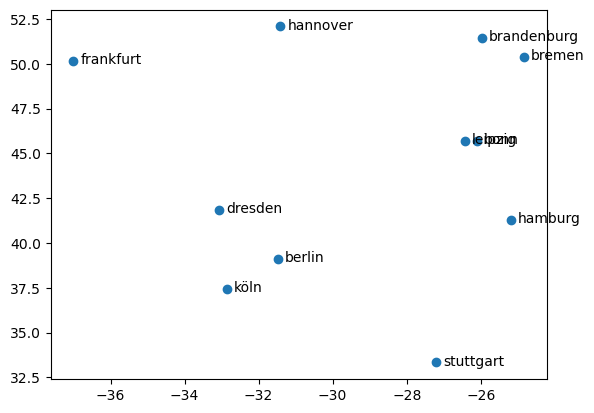

In [32]:
closestwords_tsneplot(model,'berlin',perplexity=5)

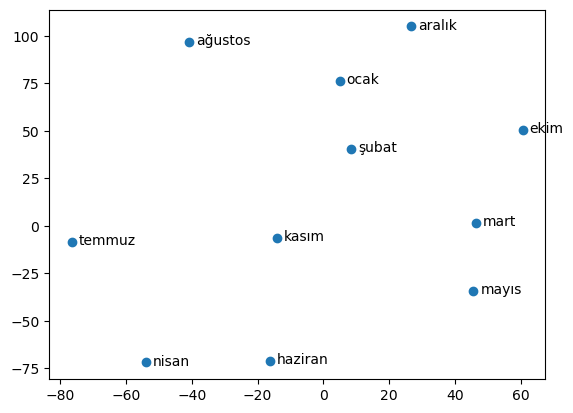

In [33]:
closestwords_tsneplot(model,'temmuz',perplexity=5)

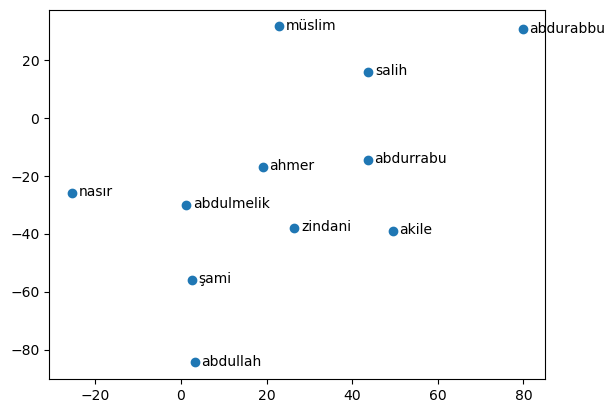

In [34]:
closestwords_tsneplot(model,'salih',perplexity=5)

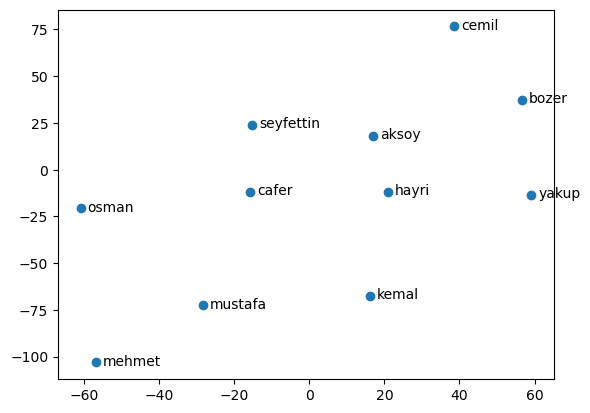

In [35]:
closestwords_tsneplot(model,'mustafa',perplexity=5)

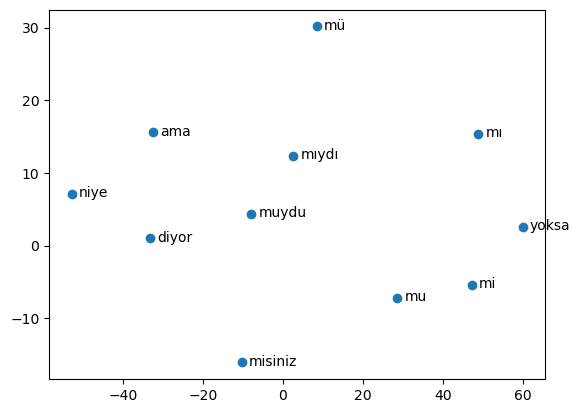

In [36]:
closestwords_tsneplot(model,'mu',perplexity=5)